# Astrodinámica para Ingeniería Aeroespacial
## Profesor Jorge I. Zuluaga

## Clase 5 - Problema de Lambert (parte 3)
<a target="_blank" href="https://colab.research.google.com/github/seap-udea/notas-astrodyn/blob/main/Clase-05-astrodyn-problema_lambert_3.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Requerimientos

In [1]:
import sys
if 'pymcel' not in sys.modules:
    print("Installing PyMCEL")
    !pip3 install -Uq pymcel

Installing PyMCEL
ERROR: Could not install packages due to an OSError: Cannot move the non-empty directory '/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pymcel-0.6.5.dist-info/': Lacking write permission to '/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pymcel-0.6.5.dist-info/'.



## Rutinas y constantes requeridas

In [1]:
import pymcel as pc
import numpy as np
import matplotlib.pyplot as plt
import spiceypy as spy
from matplotlib.patches import Circle
grados = np.pi/180
radianes = 1/grados

def dibuja_conica(ax,e=0.5,p=1,w=0):

    # Convertimos el argumento del periapsis a radianes
    w = w*grados

    # Calculamos los puntos en el sistema natural de la cónica
    phi = np.pi if e<1 else 0.99*np.arccos(-1/e)
    fs = np.linspace(-phi, phi, 1000)
    rs = p/(1+e*np.cos(fs))
    xps = rs*np.cos(fs)
    yps = rs*np.sin(fs)
    zps = np.zeros_like(xps)

    # ROtamos los puntos
    R = spy.rotate(-w, 3)
    xs, ys, zs = pc.rota_puntos(R,xps,yps,zps)

    # Graficamos
    ax.plot(xs, ys)

def lambert_geometrico(P1,P2,a,plot=False):
  # Distancias
  r1 = np.linalg.norm(P1)
  r2 = np.linalg.norm(P2)

  # Posición de los focos vacantes
  try:
    Fsx,Fsy,Ftx,Fty = pc.intersecta_circunferencias(P1[0],P1[1],2*a-r1,P2[0],P2[1],2*a-r2)
  except:
    return None

  # Vectores dirigidos a los focos vacantes
  Fsvec = np.array([Fsx,Fsy,0])
  Ftvec = np.array([Ftx,Fty,0])

  # Dependiendo de la distancia determina el nombre
  if np.linalg.norm(Ftvec) < np.linalg.norm(Fsvec):
    Fsvec,Ftvec = Ftvec,Fsvec

  # Dirección de los vectores de excentricidad
  ehats = -Fsvec/np.linalg.norm(Fsvec)
  ehatt = -Ftvec/np.linalg.norm(Ftvec)

  # Argumento del periapsis
  ws = np.arctan2(ehats[1],ehats[0])
  wt = np.arctan2(ehatt[1],ehatt[0])

  # Excentricidades de las órbitas calculadas
  es = np.linalg.norm(Fsvec)/(2*a)
  et = np.linalg.norm(Ftvec)/(2*a)

  # Semiejes mayores
  ps = a*(1-es**2)
  pt = a*(1-et**2)

  # Dibuja solución
  if plot:
    print(f"Argumento del periapsis de los focos vacantes:",ws*radianes,wt*radianes)
    print(f"Excentricidades de las elipses encontradas:",es,et)
    print(f"Semilatus recti de las elipses encontradas:",ps,pt)

    fig = plt.figure(figsize=(5,5))
    ax = fig.add_subplot(111)

    # Dibuja circunferencias
    c1 = Circle(P1,radius=2*a-r1,color='r',fill=False,ls='--',alpha=0.2)
    ax.add_patch(c1)

    c2 = Circle(P2,radius=2*a-r2,color='b',fill=False,ls='--',alpha=0.2)
    ax.add_patch(c2)

    # Dibuja posición de los focos vacantes encontrados
    ax.plot(0,0,'kx',ms=10)
    ax.text(0,0,'F')

    ax.plot(Fsvec[0],Fsvec[1],'ko')
    ax.text(Fsvec[0],Fsvec[1],r'$F_*$',color='k')

    ax.plot(Ftvec[0],Ftvec[1],'ko')
    ax.text(Ftvec[0],Ftvec[1],r'$\tilde F_{*}$',color='k')

    # Dibuja las cónicas
    dibuja_conica(ax,es,ps,ws*radianes)
    ax.plot(P1[0],P1[1],'ro')
    ax.plot(P2[0],P2[1],'bo')

    dibuja_conica(ax,et,pt,wt*radianes)
    ax.plot(P1[0],P1[1],'ro')
    ax.plot(P2[0],P2[1],'bo')

    ax.axis('equal')
    ax.grid()

  if plot:
    return r1, r2, ehats, ehatt, es, et, ps, pt, ws, wt, fig, ax
  else:
    return r1, r2, ehats, ehatt, es, et, ps, pt, ws, wt

Paquete pymcel cargado. Versión: 0.6.7


## Solución geométrica

Argumento del periapsis de los focos vacantes: 13.102720739531922 -133.95223093947584
Excentricidades de las elipses encontradas: 0.3377151054194339 0.8533314563992094
Semilatus recti de las elipses encontradas: 1.328922761357311 0.4077381382794063


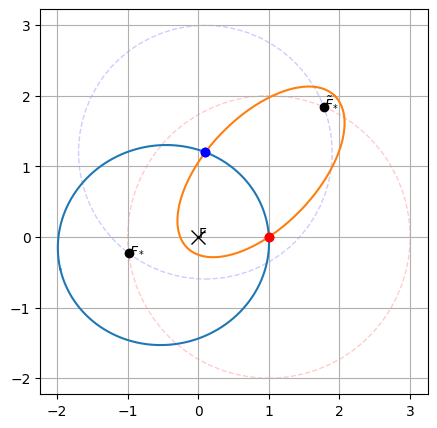

In [2]:
P1 = np.array([1,0,0])
P2 = np.array([0.1,1.2,0])
a = 1.5

r1,r2,ehats,ehatt,es,et,ps,pt,ws,wt,fig,ax = lambert_geometrico(P1,P2,a,plot=True)

## Notas de clase

Órbita de mínimo semieje mayor:

In [3]:
cvec = P2 - P1
c = np.linalg.norm(cvec)
am = (r1 + r2 + c)/4
am

np.float64(0.9260398644698074)

Órbita de mínima excentricidad:

In [4]:
es = (r2 - r1)/c
es

np.float64(0.13610630525281975)

In [5]:
ps = r1 - es*(P2 - P1)@P1/c
ps

np.float64(1.0816637831516918)

In [6]:
a_s = ps/(1 - es**2)
a_s

np.float64(1.1020797289396147)

Argumento del periapsis de los focos vacantes: -53.13010235415602 -132.51044707800085
Excentricidades de las elipses encontradas: 0.13610630525281972 0.7385500417362116
Semilatus recti de las elipses encontradas: 1.0816637831516918 0.5009435474063278


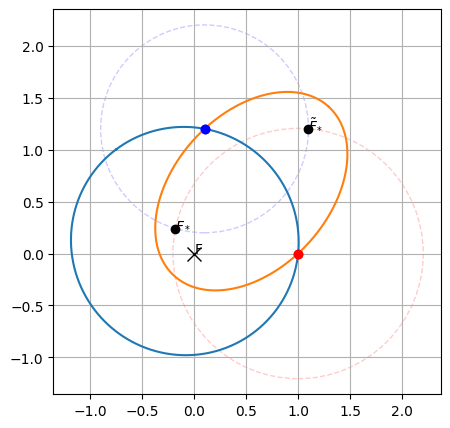

In [7]:
r1,r2,ehats,ehatt,es,et,ps,pt,ws,wt,fig,ax = lambert_geometrico(P1,P2,a_s,plot=True)

In [8]:
def foo():
  es = (r2 - r1)/c
  ps = r1 - es*(P2 - P1)@P1/c
  a_s = ps/(1 - es**2)
%timeit foo()

2.85 μs ± 101 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


## Tiempo de vuelo

In [9]:
am

np.float64(0.9260398644698074)

In [10]:
a = 2

Argumento del periapsis de los focos vacantes: 21.44472864251333 -134.46679523568127
Excentricidades de las elipses encontradas: 0.511717080711325 0.903593850220655
Semilatus recti de las elipses encontradas: 1.4762912586165586 0.36703630768682505


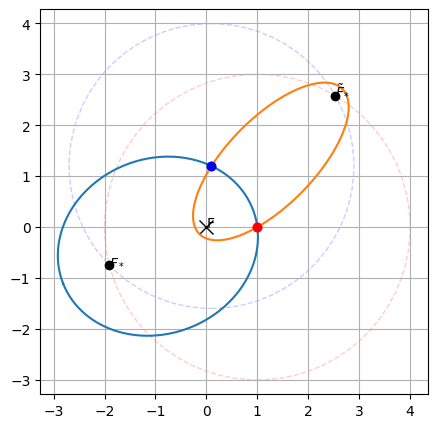

In [11]:
r1,r2,ehats,ehatt,es,et,ps,pt,ws,wt,fig,ax = lambert_geometrico(P1,P2,a,plot=True)

In [12]:
# Cálculo de la menos excéntrica
Eo2 = np.arccos((1 - r2/a)/es)
Eo2*radianes

np.float64(38.95702909997522)

In [13]:
E2 = Eo2

In [14]:
Eo1 = np.arccos((1 - r1/a)/es)
Eo1*radianes

np.float64(12.284700587132201)

In [15]:
eyp = np.cross([0,0,1],ehats)
sgny = np.dot(P1,eyp)
sgny

np.float64(-0.3656035130512577)

In [16]:
E1 = 2*np.pi - Eo1
E1

np.float64(6.068776834312449)

In [17]:
mu = 1
n = np.sqrt(mu/a**3)
P = 2*np.pi/n
P

np.float64(17.771531752633464)

In [18]:
E1, E2

(np.float64(6.068776834312449), np.float64(0.6799284245898108))

In [19]:
tf = (E2 - E1 - es*(np.sin(E2) - np.sin(E1)))/n
tf

np.float64(-16.459923715577645)

In [20]:
tf%P

np.float64(1.3116080370558194)

In [21]:
def tiempo_vuelo(a,P1,P2,mu=1):
  r1,r2,ehats,ehatt,es,et,ps,pt,ws,wt = lambert_geometrico(P1,P2,a,plot=False)

  n = np.sqrt(mu/a**3)
  P = 2*np.pi/n

  # Órbita de menor excentridad
  eyp = np.cross([0,0,1],ehats)
  Eo2 = np.arccos((1 - r2/a)/es)
  E2 = Eo2 if np.dot(P2,eyp)>0 else 2*np.pi - Eo2
  Eo1 = np.arccos((1 - r1/a)/es)
  E1 = Eo1 if np.dot(P1,eyp)>0 else 2*np.pi - Eo1
  tf = (E2 - E1 - es*(np.sin(E2) - np.sin(E1)))/n
  tfs1 = tf%P
  tfs2 = P - tfs1

  # Órbita de mayor excentridad
  eyp = np.cross([0,0,1],ehatt)
  Eo2 = np.arccos((1 - r2/a)/et)
  E2 = Eo2 if np.dot(P2,eyp)>0 else 2*np.pi - Eo2
  Eo1 = np.arccos((1 - r1/a)/et)
  E1 = Eo1 if np.dot(P1,eyp)>0 else 2*np.pi - Eo1
  tf = (E2 - E1 - et*(np.sin(E2) - np.sin(E1)))/n
  tft1 = tf%P
  tft2 = P - tft1

  return tfs1, tfs2, tft1, tft2

In [22]:
tiempo_vuelo(2,P1,P2)

(np.float64(1.3116080370558194),
 np.float64(16.459923715577645),
 np.float64(16.257499243556357),
 np.float64(1.5140325090771078))

Text(0, 0.5, '$t_f$')

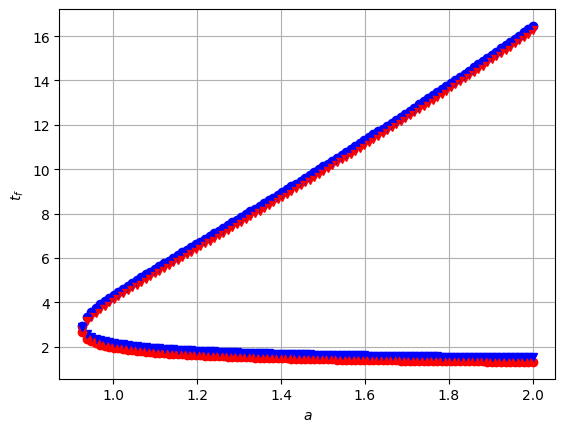

In [23]:
P1 = np.array([1,0,0])
P2 = np.array([0.1,1.2,0])
r1 = np.linalg.norm(P1)
r2 = np.linalg.norm(P2)
c = np.linalg.norm(P2 - P1)
am = (r1 + r2 + c)/4

aes = np.linspace(2,1.0001*am,100)

fig = plt.figure()
ax = fig.add_subplot(111)
for a in aes:
  tfs1, tfs2, tft1, tft2 = tiempo_vuelo(a,P1,P2)
  ax.plot(a,tfs1,'ro')
  ax.plot(a,tfs2,'bo')

  ax.plot(a,tft1,'rv')
  ax.plot(a,tft2,'bv')

ax.grid()
ax.set_xlabel(r'$a$')
ax.set_ylabel(r'$t_f$')

In [24]:
tfs1, tfs2, tft1, tft2 = tiempo_vuelo(1.0001*am,P1,P2)
tfs1, tfs2, tft1, tft2

(np.float64(2.6596102498427614),
 np.float64(2.9404091740704903),
 np.float64(2.730907158644492),
 np.float64(2.8691122652687597))

## Versión de Lambert de la Ecuación de Kepler

In [25]:
mu = 1
P1 = np.array([1,0,0])
P2 = np.array([0.1,1.2,0])
r1 = np.linalg.norm(P1)
r2 = np.linalg.norm(P2)
c = np.linalg.norm(P2 - P1)
s = (r1 + r2 + c)/2
a = 2

alfa = 2*np.arcsin((s/(2*a))**0.5)
beta = 2*np.arcsin(((s-c)/(2*a))**0.5)

tf = (a**(3/2)*(alfa - beta - (np.sin(alfa) - np.sin(beta))))/np.sqrt(mu)
c, s, alfa, beta, tf

(np.float64(1.5),
 np.float64(1.8520797289396147),
 np.float64(1.4967685965013495),
 np.float64(0.6024316990444019),
 np.float64(1.3116080370558185))

## Los tiempos extremos

In [26]:
# Variables de partida
mu = 1
P1 = np.array([1,0,0])
P2 = np.array([0.1,1.2,0])

# Variables derivadas
r1 = np.linalg.norm(P1)
r2 = np.linalg.norm(P2)
c = np.linalg.norm(P2 - P1)
s = (r1 + r2 + c)/2

# Tiempo en órbita de mínima energía
am = s/2

alfam = np.pi
betam = 2*np.arcsin(((s-c)/(2*am))**0.5)

tm = (am**(3/2)*(alfam - betam - (np.sin(alfam) - np.sin(betam))))/np.sqrt(mu)
tm

np.float64(2.694838053499467)

Text(0, 0.5, '$t_f$')

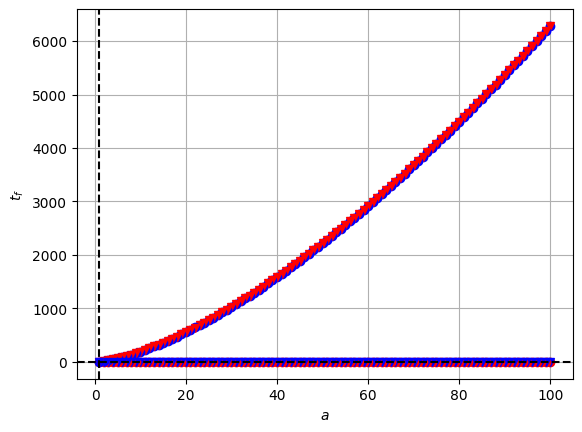

In [27]:
aes = np.linspace(100,1.0001*am,100)

fig = plt.figure()
ax = fig.add_subplot(111)
for a in aes:
  tfs1, tfs2, tft1, tft2 = tiempo_vuelo(a,P1,P2)
  ax.plot(a,tfs1,'ro')
  ax.plot(a,tfs2,'bo')

  ax.plot(a,tft1,'rv')
  ax.plot(a,tft2,'bv')

ax.axvline(am,ls='--',color='k')
ax.axhline(tm,ls='--',color='k')

ax.grid()
ax.set_xlabel(r'$a$')
ax.set_ylabel(r'$t_f$')

El límite de la ecuación de Lambert:


In [28]:
import sympy as sp

In [29]:
a,s,c = sp.symbols('a,s,c')

In [30]:
alfa = 2*sp.asin(sp.sqrt(s/(2*a)))
beta = 2*sp.asin(sp.sqrt((s-c)/(2*a)))
ftf = sp.sqrt(a**3)*(alfa - beta - (sp.sin(alfa) - sp.sin(beta)))
ftf

(-sin(2*asin(sqrt(2)*sqrt(s/a)/2)) + sin(2*asin(sqrt(2)*sqrt((-c + s)/a)/2)) + 2*asin(sqrt(2)*sqrt(s/a)/2) - 2*asin(sqrt(2)*sqrt((-c + s)/a)/2))*sqrt(a**3)

In [31]:
sp.simplify(sp.limit(ftf,a,sp.oo))

sqrt(2)*(c*sqrt(-c + s) + s**(3/2) - s*sqrt(-c + s))/3

Calculemos

In [32]:
# Variables de partida
mu = 1
P1 = np.array([1,0,0])
P2 = np.array([0.1,1.2,0])

# Variables derivadas
r1 = np.linalg.norm(P1)
r2 = np.linalg.norm(P2)
c = np.linalg.norm(P2 - P1)
s = (r1 + r2 + c)/2

# Tiempo en órbita de mínima energía
am = s/2

alfam = np.pi
betam = 2*np.arcsin(((s-c)/(2*am))**0.5)

tm = (am**(3/2)*(alfam - betam - (np.sin(alfam) - np.sin(betam))))/np.sqrt(mu)
tp = 2**0.5/3*(s**(3/2) - (s-c)**(3/2))/mu**0.5

tm, tp

(np.float64(2.694838053499467), np.float64(1.0897011578174003))

Text(0, 0.5, '$t_f$')

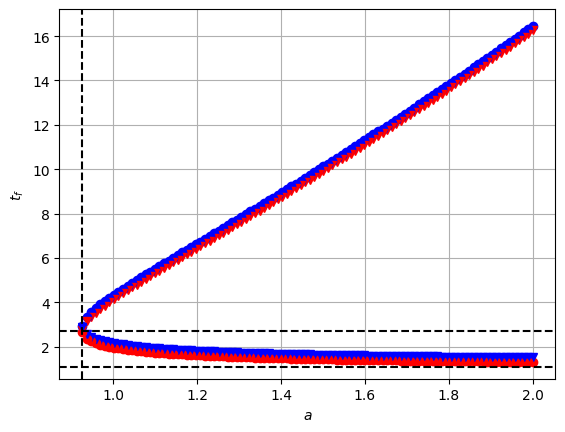

In [33]:
aes = np.linspace(2,1.0001*am,100)

fig = plt.figure()
ax = fig.add_subplot(111)
for a in aes:
  tfs1, tfs2, tft1, tft2 = tiempo_vuelo(a,P1,P2)
  ax.plot(a,tfs1,'ro')
  ax.plot(a,tfs2,'bo')

  ax.plot(a,tft1,'rv')
  ax.plot(a,tft2,'bv')

ax.axvline(am,ls='--',color='k')
ax.axhline(tm,ls='--',color='k')
ax.axhline(tp,ls='--',color='k')

ax.grid()
ax.set_xlabel(r'$a$')
ax.set_ylabel(r'$t_f$')

## Cuadrantes en el problema de Lambert

In [34]:
mu = 1
P1 = np.array([1,0,0])
P2 = np.array([0.1,1.2,0])
r1 = np.linalg.norm(P1)
r2 = np.linalg.norm(P2)
c = np.linalg.norm(P2 - P1)
s = (r1 + r2 + c)/2
a = 2

alfa0 = 2*np.arcsin((s/(2*a))**0.5)
beta0 = 2*np.arcsin(((s-c)/(2*a))**0.5)

alfa = alfa0
beta = beta0
tf = (a**(3/2)*(alfa - beta - (np.sin(alfa) - np.sin(beta))))/np.sqrt(mu)
print(f"Tiempo corto por teta < pi (órbita menos excentrica): {tf}")

alfa = alfa0
beta = -beta0
tf = (a**(3/2)*(alfa - beta - (np.sin(alfa) - np.sin(beta))))/np.sqrt(mu)
print(f"Tiempo corto por teta > pi (órbita más excentrica) : {tf}")

alfa = 2*np.pi - alfa0
beta = beta0
tf = (a**(3/2)*(alfa - beta - (np.sin(alfa) - np.sin(beta))))/np.sqrt(mu)
print(f"Tiempo largo por teta < pi (órbita más excentrica) : {tf}")

alfa = 2*np.pi - alfa0
beta = -beta0
tf = (a**(3/2)*(alfa - beta - (np.sin(alfa) - np.sin(beta))))/np.sqrt(mu)
print(f"Tiempo largo por teta > pi (órbita menos excentrica) : {tf}")

Tiempo corto por teta < pi (órbita menos excentrica): 1.3116080370558185
Tiempo corto por teta > pi (órbita más excentrica) : 1.5140325090771038
Tiempo largo por teta < pi (órbita más excentrica) : 16.25749924355636
Tiempo largo por teta > pi (órbita menos excentrica) : 16.45992371557765


In [35]:
teta0 = np.arccos((P1@P2)/(r1*r2))
print(teta0*radianes)
teta0 = np.arccos(-(c**2-r1**2-r2**2)/(2*r1*r2))
print(teta0*radianes)

85.23635830927383
85.23635830927383


In [36]:
import math as m
%timeit np.arccos((P1@P2)/(r1*r2))
%timeit np.arccos(-(c**2-r1**2-r2**2)/(2*r1*r2))
%timeit m.acos(-(c**2-r1**2-r2**2)/(2*r1*r2))

1.72 μs ± 28.1 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)
1 μs ± 127 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)
470 ns ± 3.36 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


## Solución al problema de Lambert

El problema de Lambert consiste en:

- Dado: $\vec P_1$, $\vec P_2$, un tiempo $t_f$ y una elección o $\theta_0$ o $2\pi-\theta_0$.
- Encuentre: $a$ (y $p$, $e$).

In [37]:
def funcion_de_lambert(a,
                       mu=1, tf=1,
                       P1=np.array([1,0,0]), P2=np.array([0,1,0]),
                       corto=True, velocity=False):

  # Propiedades derivadas
  r1 = np.linalg.norm(P1)
  r2 = np.linalg.norm(P2)
  c = np.linalg.norm(P2 - P1)
  s = (r1 + r2 + c)/2

  # Alfa y beta: valores principales
  alfa0 = 2*np.arcsin((s/(2*a))**0.5)
  beta0 = 2*np.arcsin(((s-c)/(2*a))**0.5)

  # Evaluo los tiempos extremos de la transferencia
  am = s/2
  alfam = np.pi
  betam = 2*np.arcsin(((s-c)/(2*am))**0.5)

  # Tiempo en órbita de mínimo energía
  tm = (am**(3/2)*(alfam - betam - (np.sin(alfam) - np.sin(betam))))/np.sqrt(mu)

  # Tiempo parabólico
  tp = 2**0.5/3*(s**(3/2) - (s-c)**(3/2))/mu**0.5

  # Condiciones
  if tf < tp:
    raise ValueError(f"El tiempo que pasaste {tf} es muy corto (tp = {tp})")

  # Escogemos los cuadrantes
  alfa = alfa0 if tf<tm else 2*np.pi - alfa0
  beta = beta0 if corto else -beta0

  teta0 = np.arccos((P1@P2)/(r1*r2))
  if tf < tm:
    alfa = alfa0
    if corto:
      esmall = False
      beta = beta0
      teta = teta0
    else:
      esmall = True
      beta = -beta0
      teta = 2*np.pi - teta0
  else:
    alfa = 2*np.pi - alfa0
    if corto:
      esmall = True
      beta = beta0
      teta = teta0
    else:
      esmall = False
      beta = -beta0
      teta = 2*np.pi - teta0

  # Los dos ps
  ps = 4*a*(s - r1)*(s - r2)/c**2*np.sin((alfa+beta)/2)**2
  pt = 4*a*(s - r1)*(s - r2)/c**2*np.sin((alfa-beta)/2)**2
  if esmall:
    p = min(ps,pt)
  else:
    p = max(ps,pt)

  # Velocidades
  v1 = np.sqrt(mu*p)/(r1*r2*np.sin(teta))*(P2 - (1-r2/p*(1-np.cos(teta)))*P1)
  v2 = -np.sqrt(mu*p)/(r1*r2*np.sin(teta))*(P1 - (1-r1/p*(1-np.cos(teta)))*P2)

  # Calculo el tiempo de vuelo
  fl = (a**(3/2)*(alfa - beta - (np.sin(alfa) - np.sin(beta))))/np.sqrt(mu) - tf

  if velocity:
    return v1, v2
  else:
    return fl

In [38]:
funcion_de_lambert(2)

np.float64(0.1528090152522985)

In [39]:
funcion_de_lambert(2,velocity=True)

(array([-0.33107672,  1.17914724,  0.        ]),
 array([-1.17914724,  0.33107672, -0.        ]))

Text(0, 0.5, '$t_f$')

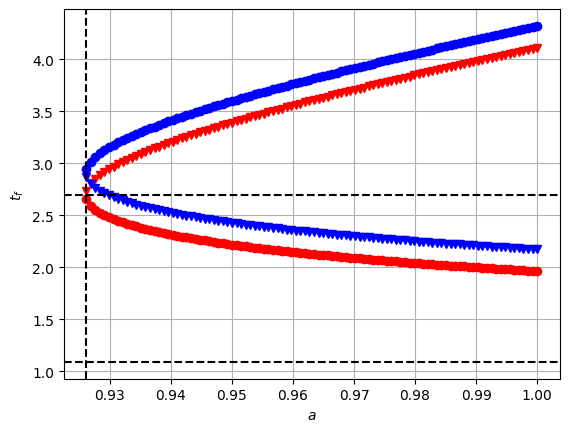

In [40]:
mu = 1
P1 = np.array([1,0,0])
P2 = np.array([0.1,1.2,0])
r1 = np.linalg.norm(P1)
r2 = np.linalg.norm(P2)
c = np.linalg.norm(P2 - P1)
s = (r1 + r2 + c)/2
am = s/2

aes = np.linspace(1,1.0001*am,100)

fig = plt.figure()
ax = fig.add_subplot(111)
for a in aes:
  tfs1, tfs2, tft1, tft2 = tiempo_vuelo(a,P1,P2)
  ax.plot(a,tfs1,'ro')
  ax.plot(a,tfs2,'bo')

  ax.plot(a,tft1,'rv')
  ax.plot(a,tft2,'bv')

ax.axvline(am,ls='--',color='k')
ax.axhline(tm,ls='--',color='k')
ax.axhline(tp,ls='--',color='k')

ax.grid()
ax.set_xlabel(r'$a$')
ax.set_ylabel(r'$t_f$')

In [41]:
funcion_de_lambert(1,mu=mu,tf=1.965,P1=P1,P2=P2,corto=False)

np.float64(0.20656751563676656)

In [42]:
from scipy.optimize import bisect

In [43]:
mu = 1
P1 = np.array([1,0,0])
P2 = np.array([0.1,1.2,0])
r1 = np.linalg.norm(P1)
r2 = np.linalg.norm(P2)
c = np.linalg.norm(P2 - P1)
s = (r1 + r2 + c)/2
am = s/2

tf = 1.3
af = bisect(funcion_de_lambert,am,10,args=(mu,tf,P1,P2,True,False))
af

2.0790972777378305

In [44]:
v1,v2 = funcion_de_lambert(af,mu,tf,P1,P2,True,True)
v1, v2

(array([-0.16305283,  1.2216529 ,  0.        ]),
 array([-0.97878843,  0.47106775, -0.        ]))

Podemos verificar:

In [46]:
from pymcel.extra import solucion_lambert
solucion_lambert(P1,P2,tf,mu,direccion='pro')

(array([-0.16305283,  1.2216529 ,  0.        ]),
 array([-0.97878843,  0.47106775,  0.        ]),
 {'z': np.float64(0.7584298485862685),
  'elts': array([0.97468509, 0.53119794, 0.        , 0.        , 0.38438609,
         6.18174522, 0.        , 1.        ])})

Text(0, 0.5, '$t_f$')

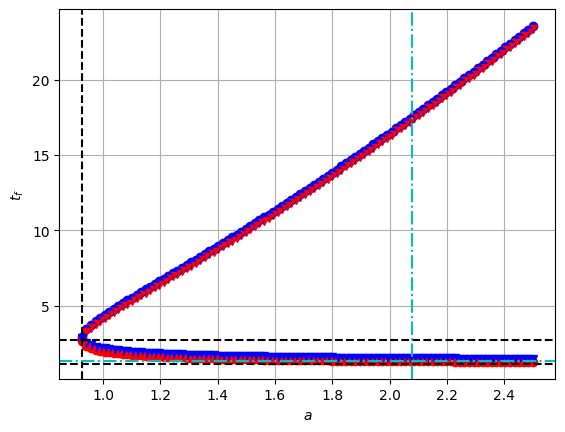

In [47]:
mu = 1
P1 = np.array([1,0,0])
P2 = np.array([0.1,1.2,0])
r1 = np.linalg.norm(P1)
r2 = np.linalg.norm(P2)
c = np.linalg.norm(P2 - P1)
s = (r1 + r2 + c)/2
am = s/2

aes = np.linspace(2.5,1.0001*am,100)

fig = plt.figure()
ax = fig.add_subplot(111)
for a in aes:
  tfs1, tfs2, tft1, tft2 = tiempo_vuelo(a,P1,P2)
  ax.plot(a,tfs1,'ro')
  ax.plot(a,tfs2,'bo')

  ax.plot(a,tft1,'rv')
  ax.plot(a,tft2,'bv')

ax.axvline(am,ls='--',color='k')
ax.axhline(tm,ls='--',color='k')
ax.axhline(tp,ls='--',color='k')

ax.axhline(tf,ls='-.',color='c')
ax.axvline(af,ls='-.',color='c')

ax.grid()
ax.set_xlabel(r'$a$')
ax.set_ylabel(r'$t_f$')

Argumento del periapsis de los focos vacantes: 22.02370074045943 -134.51394195515772
Excentricidades de las elipses encontradas: 0.5311979397007548 0.9085005864489962
Semilatus recti de las elipses encontradas: 1.4924357976319413 0.3630658642018098


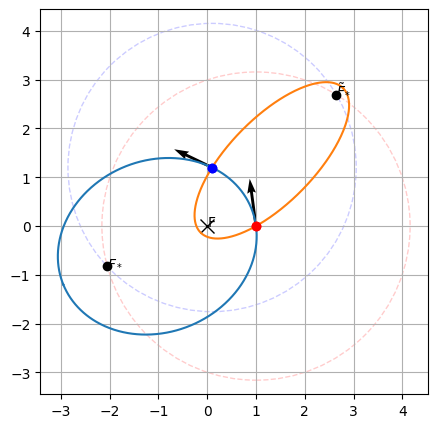

In [48]:
r1,r2,ehats,ehatt,es,et,ps,pt,ws,wt,fig,ax = lambert_geometrico(P1,P2,af,plot=True)

ax.quiver(P1[0],P1[1],v1[0],v1[1],scale=10)
ax.quiver(P2[0],P2[1],v2[0],v2[1],scale=10)

[-0.01509092 -1.0976149  -0.        ] [ 0.89282838 -0.2622085   0.        ]
Argumento del periapsis de los focos vacantes: -4.624894867183779 -133.3533166438815
Excentricidades de las elipses encontradas: 0.2054273634095591 0.8015200494132301
Semilatus recti de las elipses encontradas: 1.204758479207252 0.4497602648038664


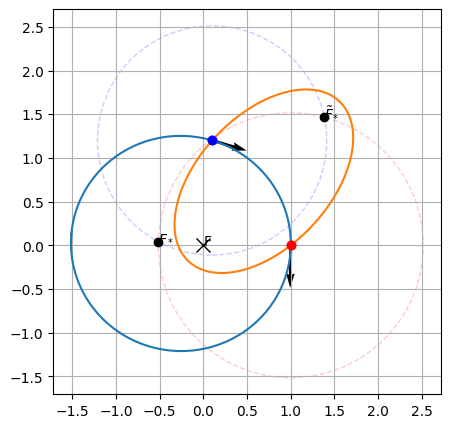

In [49]:
mu = 1
P1 = np.array([1,0,0])
P2 = np.array([0.1,1.2,0])
r1 = np.linalg.norm(P1)
r2 = np.linalg.norm(P2)
c = np.linalg.norm(P2 - P1)
s = (r1 + r2 + c)/2
am = s/2

tf = 7.3
corto = False
af = bisect(funcion_de_lambert,am,10,args=(mu,tf,P1,P2,corto,False))

v1,v2 = funcion_de_lambert(af,mu,tf,P1,P2,corto,True)
print(v1,v2)
r1,r2,ehats,ehatt,es,et,ps,pt,ws,wt,fig,ax = lambert_geometrico(P1,P2,af,plot=True)

ax.quiver(P1[0],P1[1],v1[0],v1[1],scale=10)
ax.quiver(P2[0],P2[1],v2[0],v2[1],scale=10)

Podemos verificar:

In [51]:
from pymcel.extra import solucion_lambert
solucion_lambert(P1,P2,tf,mu,direccion='retro')

(array([-0.01509092, -1.0976149 , -0.        ]),
 array([ 0.89282838, -0.2622085 , -0.        ]),
 {'z': np.float64(24.872225270302096),
  'elts': array([0.99944511, 0.20542736, 3.14159265, 0.        , 0.08071964,
         6.23109345, 0.        , 1.        ])})